In [1]:
from different_methods_conversion import *


No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.5'


In [2]:
bandpass=[100,250]
downsampled_fs=4000
threshold=0.3
num=7
true_positives = np.load(os.path.join(data_dir, f'true_positives_{bandpass[0]}_{bandpass[1]}Hz.npy'))
true_negatives = np.load(os.path.join(data_dir, f'true_negatives_{bandpass[0]}_{bandpass[1]}Hz.npy'))

In [ ]:
pos_crossing=up_down_spikes(true_positives,threshold=threshold,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,positives=True)
print(pos_crossing.shape)

(1794, 2, 246)


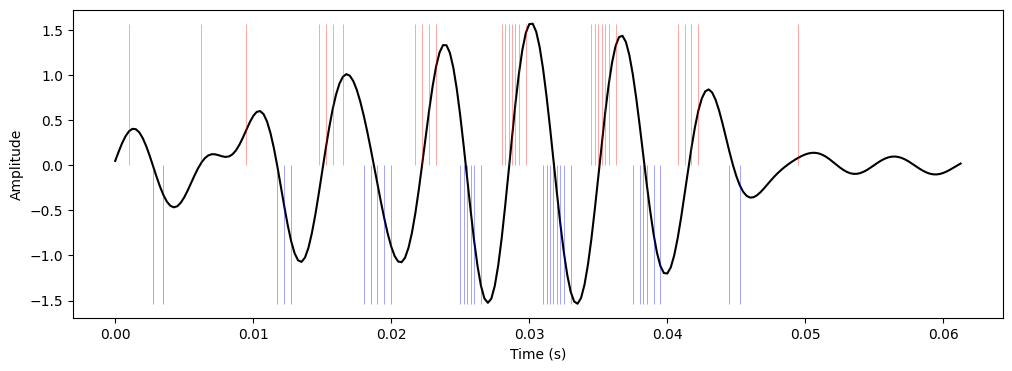

In [4]:
plot_spikes_levelcrossing(pos_crossing,true_positives,sample_num=num)

In [ ]:
neg_crossing=up_down_spikes(true_negatives,threshold=threshold,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,positives=False)
print(neg_crossing.shape)

(1800, 2, 246)


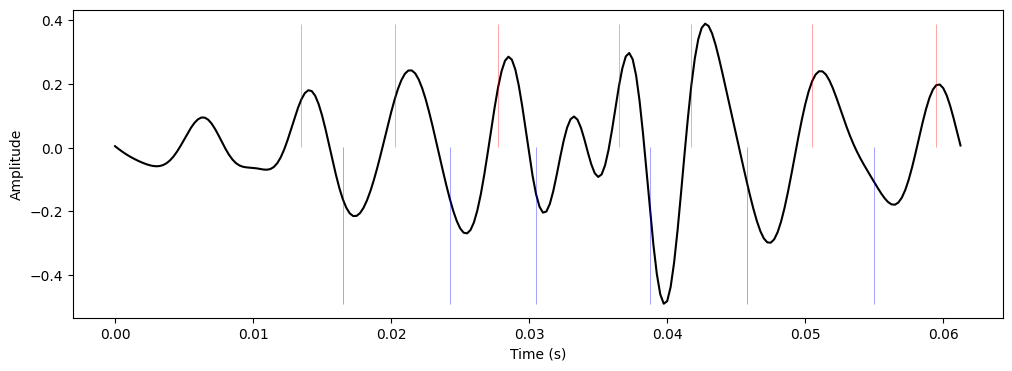

In [7]:
plot_spikes_levelcrossing(neg_crossing,true_negatives,sample_num=num)

(1794, 10, 246)


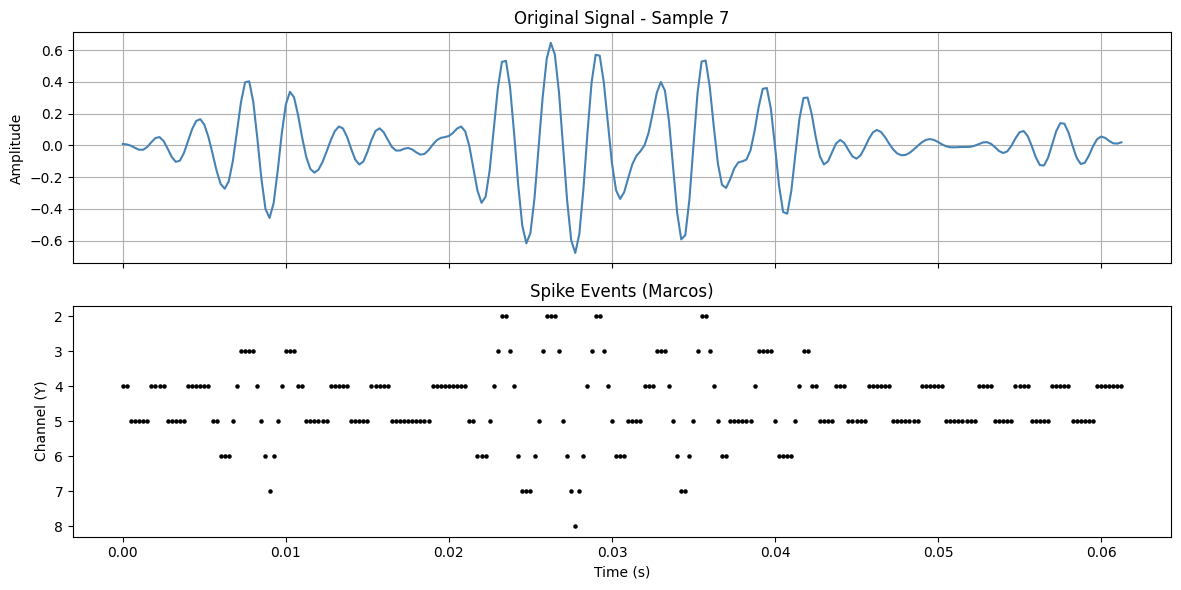

In [7]:
y_size=10
y_positive=marcos_ydiscretization(true_positives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,positives=True)
print(y_positive.shape)
plot_marcos(y_positive,true_positives,sample_num=num,fs=downsampled_fs,diff_plots=True)

(1800, 10, 246)


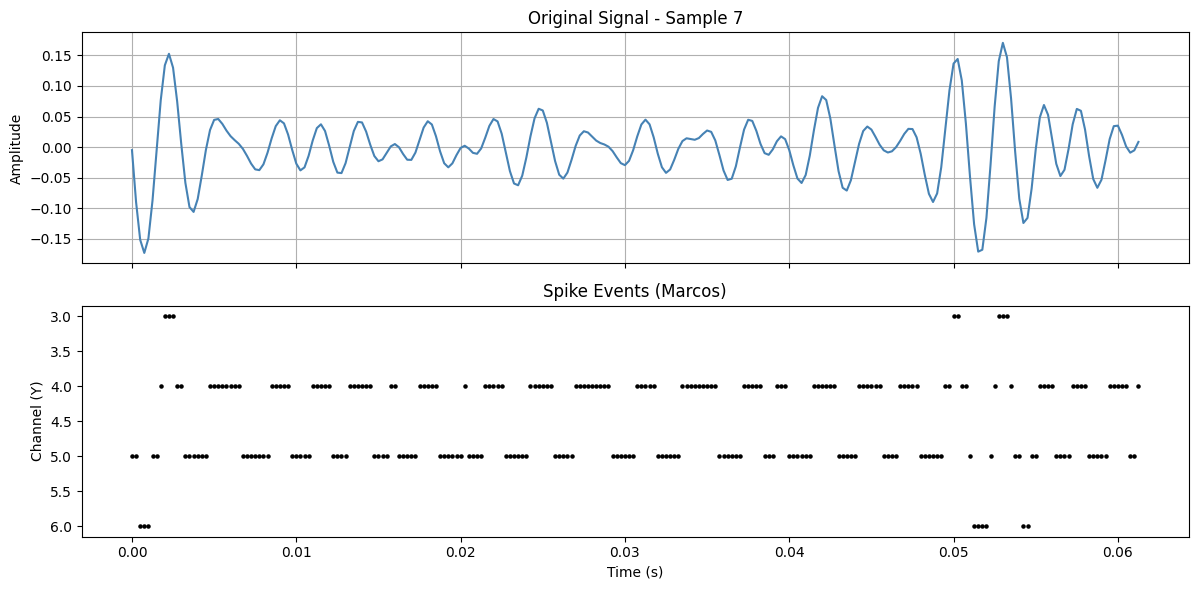

In [8]:
y_negative=marcos_ydiscretization(true_negatives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,positives=False)
print(y_negative.shape)
plot_marcos(y_negative,true_negatives,sample_num=num,fs=downsampled_fs,diff_plots=True)

(1794, 10, 246)


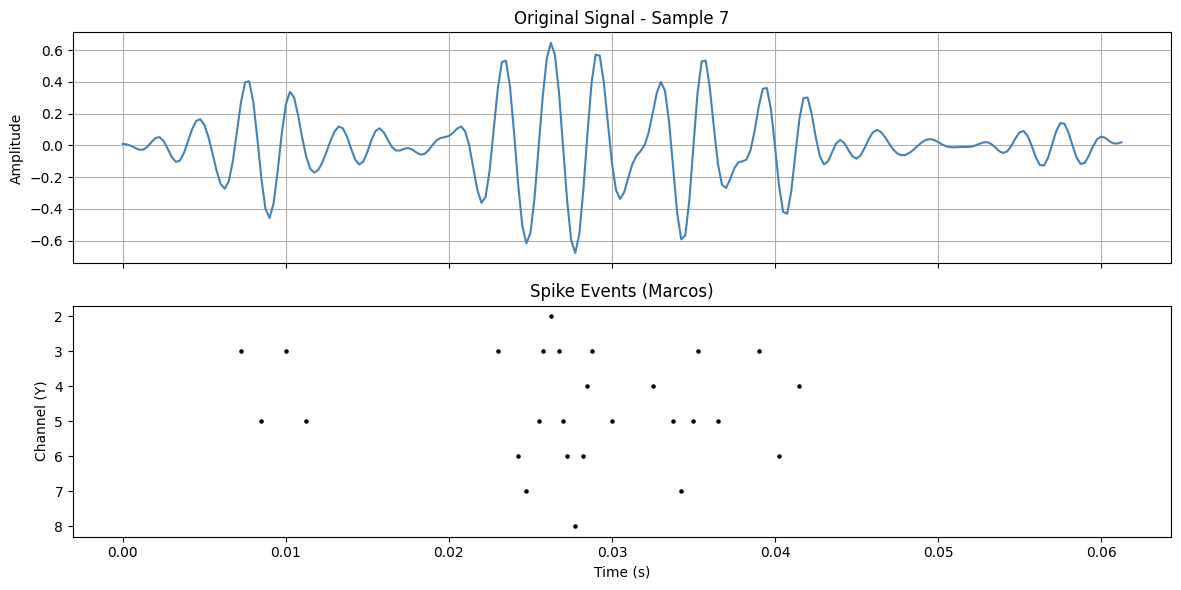

In [9]:
y_size=10
threshold_marcos=0.3
positives_mud=up_down_and_marcos(true_positives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,threshold=threshold_marcos,positives=True)
print(positives_mud.shape)
plot_marcos(positives_mud,true_positives,sample_num=num,fs=downsampled_fs,diff_plots=True)

(1800, 10, 246)


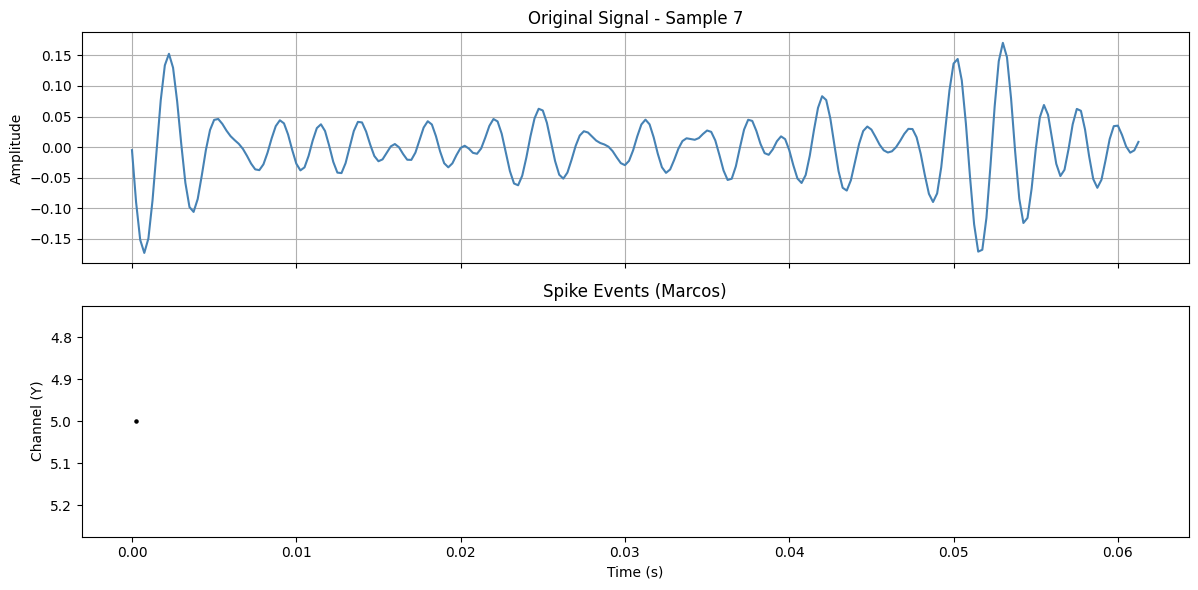

In [10]:
negatives_mud=up_down_and_marcos(true_negatives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,threshold=threshold_marcos,positives=False)
print(negatives_mud.shape)
plot_marcos(negatives_mud,true_negatives,sample_num=num,fs=downsampled_fs,diff_plots=True)

(1794, 10, 246)


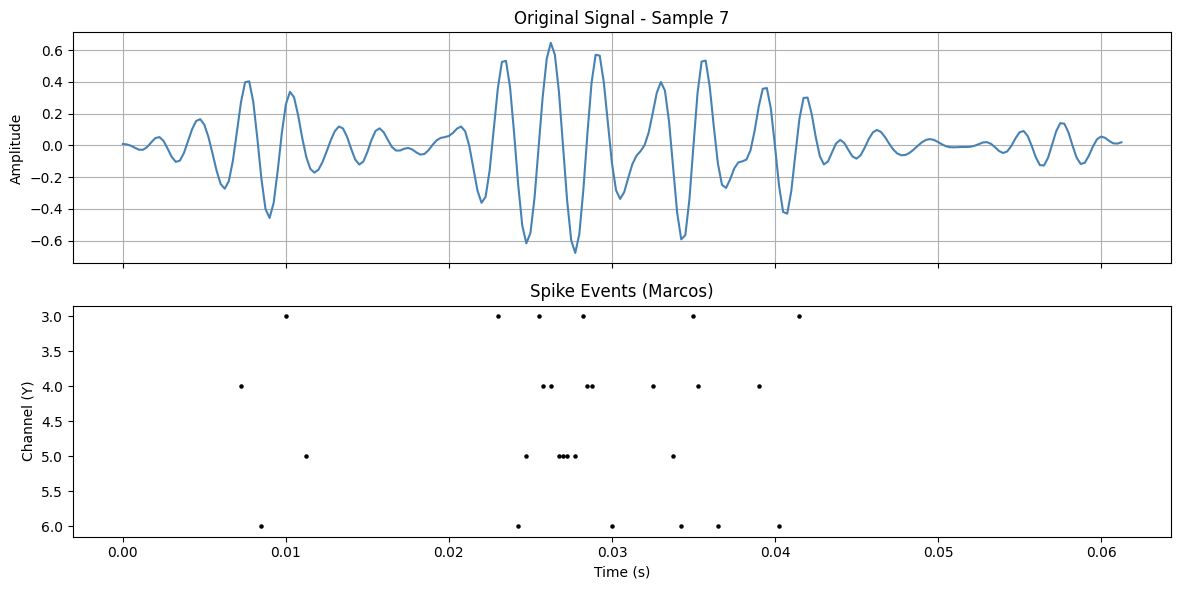

In [11]:
y_size=10
threshold_marcos=0.3
positives_mud_var=up_down_and_marcos_variation(true_positives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,threshold=threshold_marcos,positives=True)
print(positives_mud_var.shape)
plot_marcos(positives_mud_var,true_positives,sample_num=num,fs=downsampled_fs,diff_plots=True)

(1800, 10, 246)


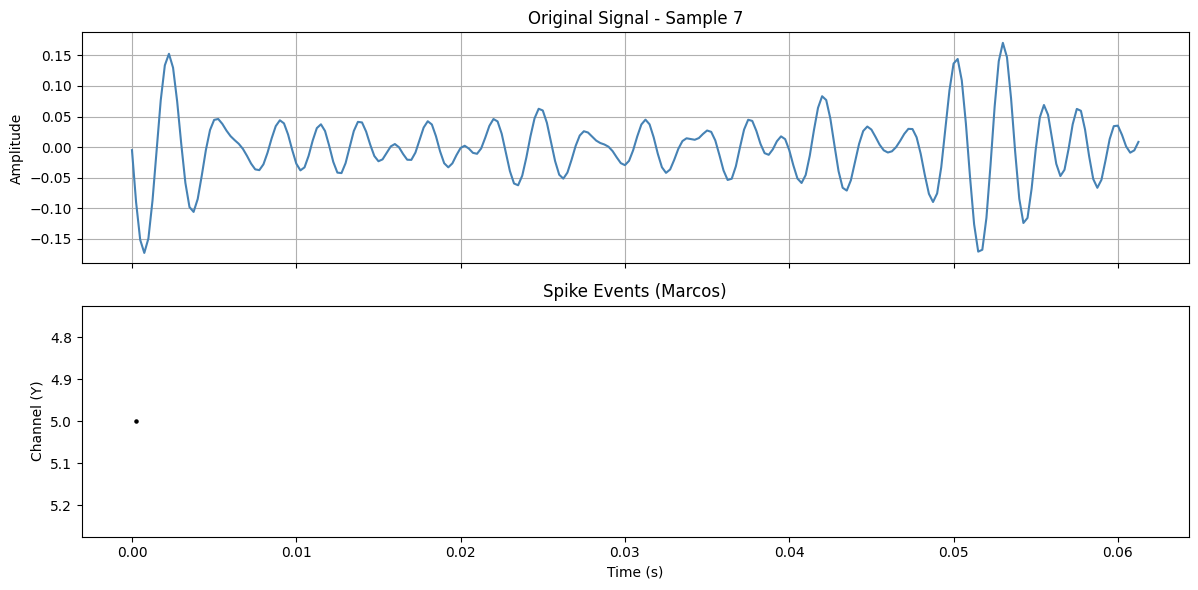

In [12]:
negatives_mud_var=up_down_and_marcos_variation(true_negatives,downsampled_fs=downsampled_fs,bandpass=bandpass,save=False,y_size=y_size,threshold=threshold_marcos,positives=False)
print(negatives_mud_var.shape)
plot_marcos(negatives_mud_var,true_negatives,sample_num=num,fs=downsampled_fs,diff_plots=True)

MovieWriter imagemagick unavailable; using Pillow instead.


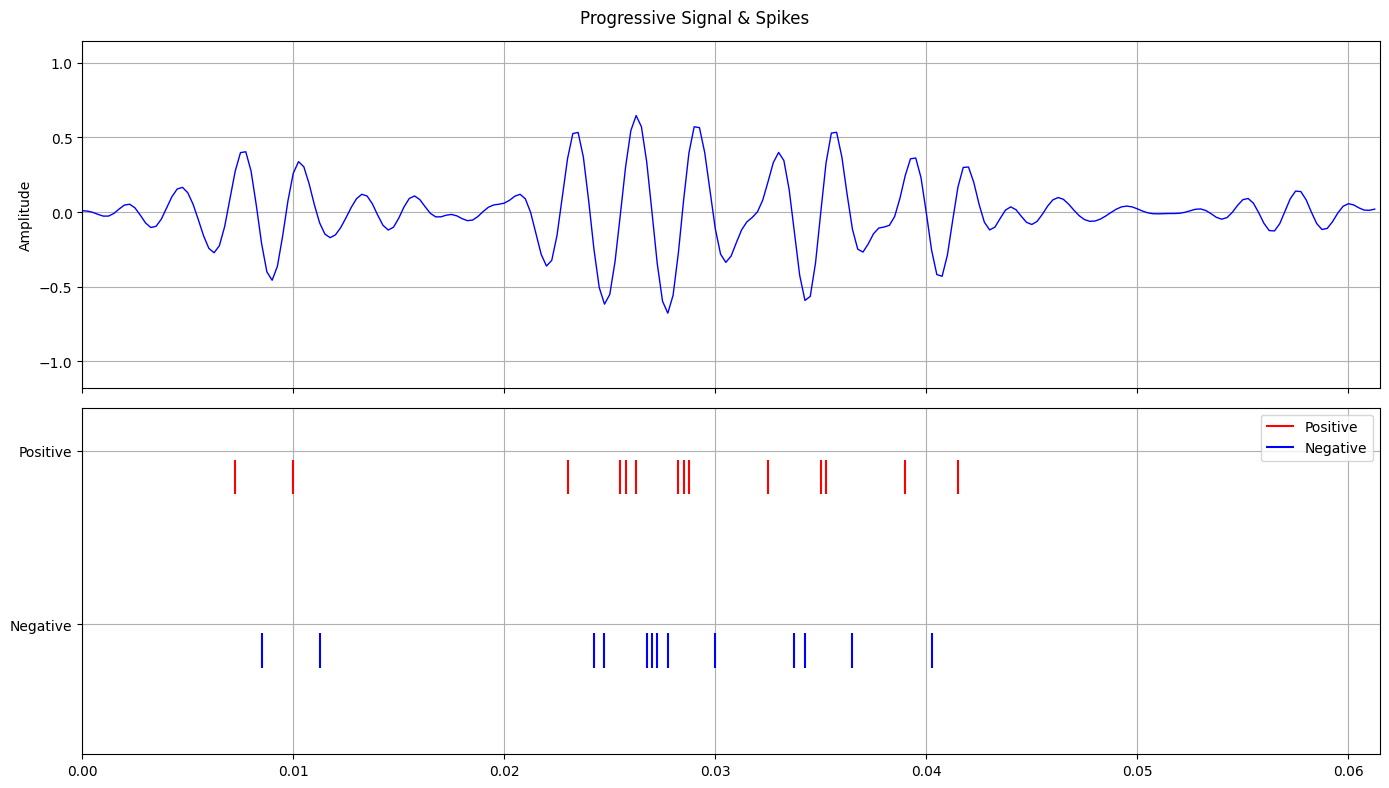

In [13]:
%matplotlib inline
from IPython.display import HTML

from animate_spikeplots import *
ani_crossing=animate_level_crossing_progressive(pos_crossing,true_positives,fs=downsampled_fs,sample_num=num,fps=5)
# ani_crossing.save("animation.gif", writer='imagemagick', fps=5)

HTML(ani_crossing.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


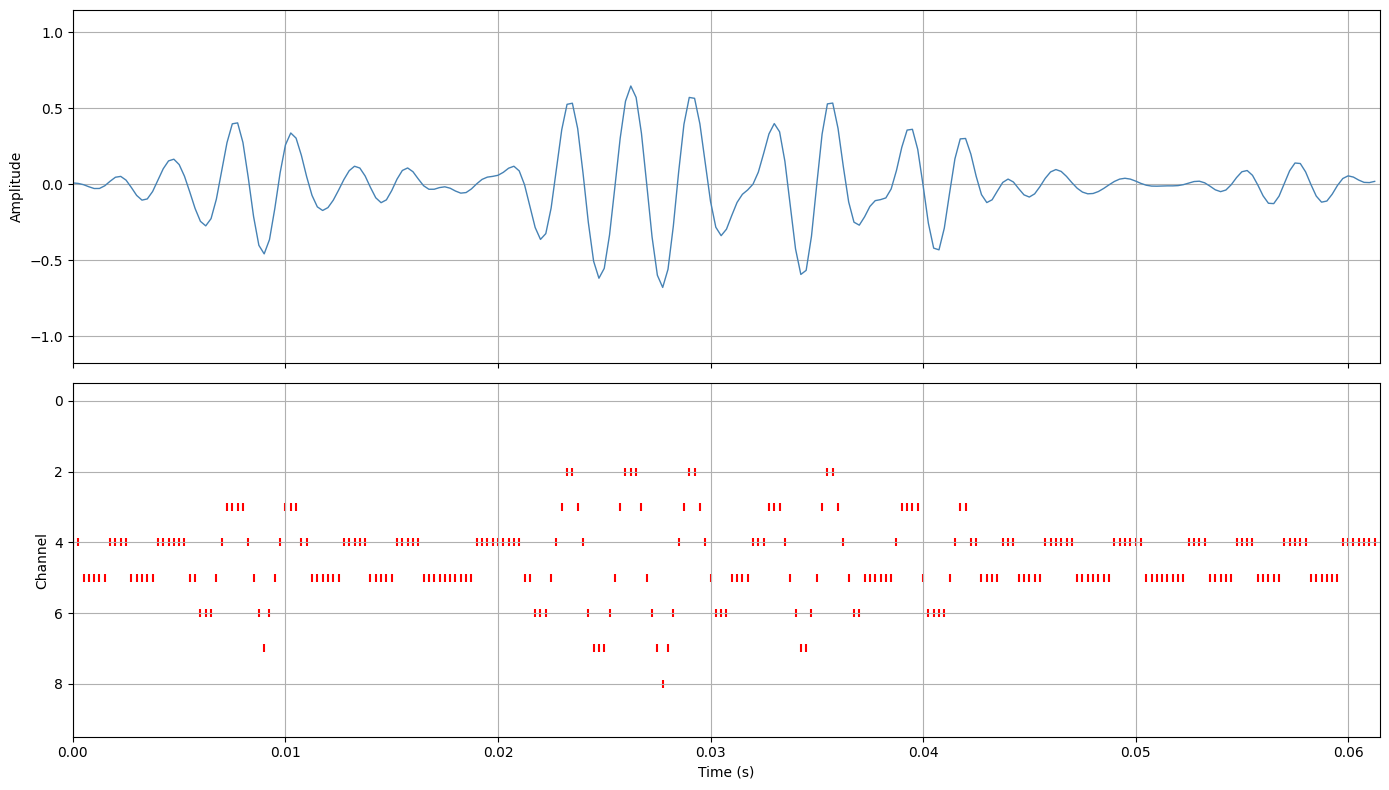

In [15]:
ani_marcos=animate_marcos_progressive(y_positive,true_positives,fs=downsampled_fs,sample_num=num,fps=5)
HTML(ani_marcos.to_jshtml())
ani_marcos.save("ani_marcos.gif", writer='imagemagick', fps=5)